# Sentiment Analysis *using Twitter dataset*
- 19bce150 - Shivam Panchal
- 19bce245 - Aayush Shah

## Importing libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import re
import nltk 

## Importing dataset

In [2]:
!git clone https://github.com/Shah-Aayush/Twitter-Sentiment-Analysis.git

Cloning into 'Twitter-Sentiment-Analysis'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 3), reused 9 (delta 2), pack-reused 0
Unpacking objects: 100% (13/13), done.


In [3]:
train = pd.read_csv('./Twitter-Sentiment-Analysis/train_tweet.csv')
test = pd.read_csv('./Twitter-Sentiment-Analysis/test_tweets.csv')

print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


## Explanatory Data Analysis

In [4]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [6]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

In [7]:
# checking out the negative comments from the train set

train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [8]:
# checking out the postive comments from the train set 

train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


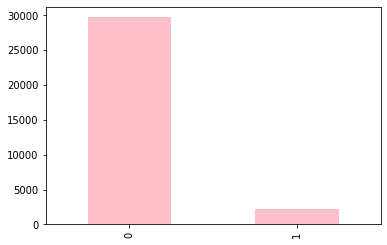

In [9]:
train['label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

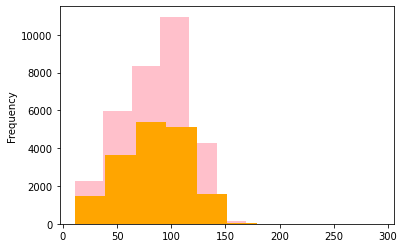

In [10]:
# checking the distribution of tweets in the data

length_train = train['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [11]:
# adding a column to represent the length of the tweet

train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


In [12]:
train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

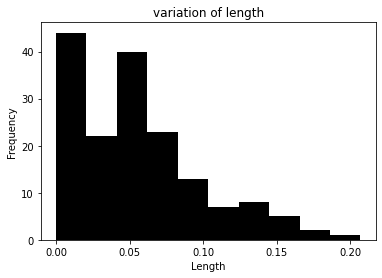

In [13]:
train.groupby('len').mean()['label'].plot.hist(color = 'black', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

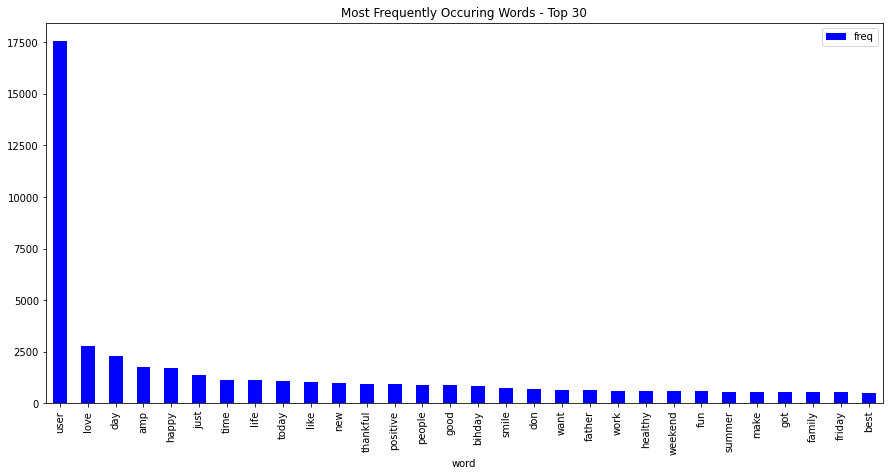

In [14]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


## WordCloud representations

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

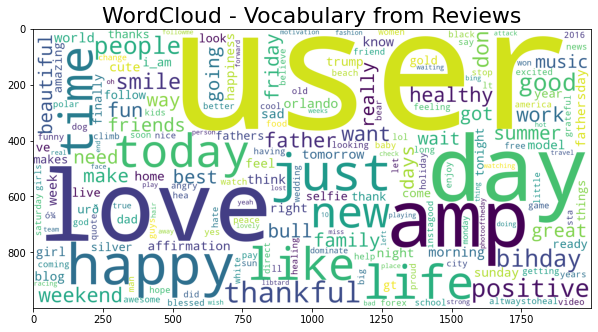

In [15]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 2000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

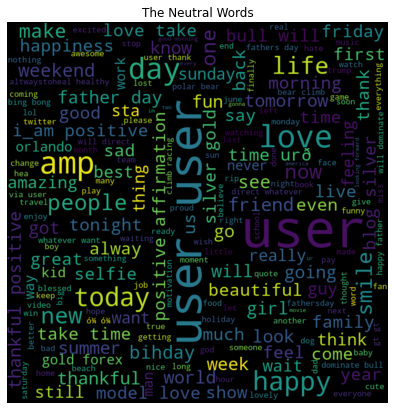

In [16]:
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=800, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()


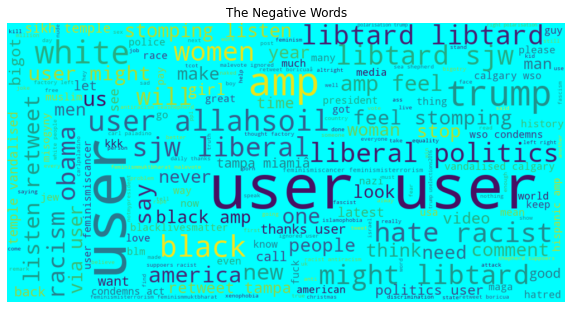

In [17]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=1000, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()


## Collecting the hashtags

In [18]:
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [19]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

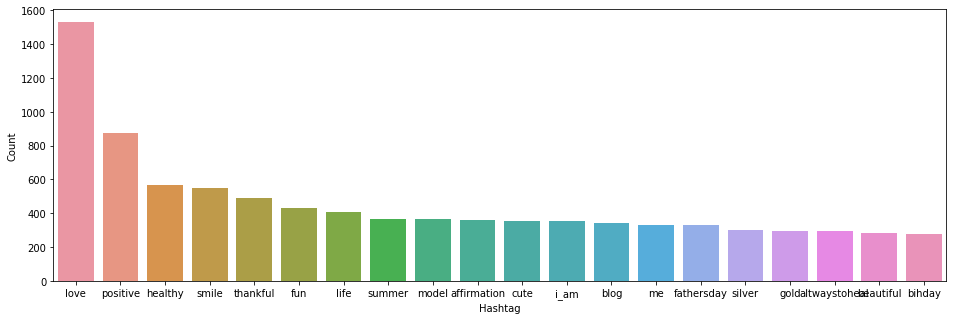

In [20]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

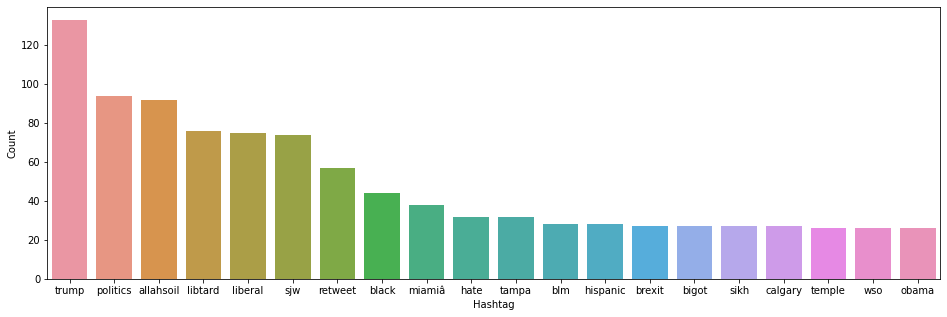

In [21]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

## Tokenization

In [22]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(6108019, 8411580)

In [23]:
model_w2v.wv.most_similar(positive = "dinner")

[('spaghetti', 0.651421070098877),
 ('#wanderlust', 0.6075868606567383),
 ('#teamlh', 0.601334273815155),
 ('#prosecco', 0.600953221321106),
 ('enroute', 0.5979521870613098),
 ('shopping!', 0.5968977212905884),
 ('coaching', 0.5968605279922485),
 ('#boardgames', 0.5955617427825928),
 ('#butterflies', 0.5945603847503662),
 ('ð\x9f\x91\x8dð\x9f\x8f»ð\x9f\x91\x8dð\x9f\x8f»ð\x9f\x91\x8dð\x9f\x8f»â\x9d¤ï¸\x8fâ\x9d¤ï¸\x8f',
  0.5926060080528259)]

In [24]:
model_w2v.wv.most_similar(positive = "cancer")

[('ways.', 0.7371195554733276),
 ('champion,', 0.7292752265930176),
 ('level.', 0.7254100441932678),
 ('spewing', 0.7237463593482971),
 ('behavior.', 0.7205325365066528),
 ('acknowledge', 0.7150945663452148),
 ('homeland', 0.7132399082183838),
 ('#merica', 0.7110322117805481),
 ('oâ\x80¦', 0.7083783149719238),
 ('roots', 0.7043190002441406)]

In [25]:
model_w2v.wv.most_similar(positive = "apple")

[('"mytraining"', 0.7187883853912354),
 ('mytraining', 0.7010025978088379),
 ('training"', 0.6987223029136658),
 ('app,', 0.6833173036575317),
 ('app', 0.6293497085571289),
 ('"my', 0.6209443807601929),
 ('ta', 0.5990232825279236),
 ('humans.', 0.5847235918045044),
 ('mp3', 0.5844755172729492),
 ('heroku', 0.5698532462120056)]

In [26]:
model_w2v.wv.most_similar(negative = "hate")

[('#apple', 0.006002580747008324),
 ('#yay', -0.047786880284547806),
 ('#cycling', -0.05036738142371178),
 ('you?', -0.05091110244393349),
 ('#games', -0.05674438551068306),
 ('hands', -0.06261172890663147),
 ('stas', -0.06766840815544128),
 ('ð\x9f\x98\x81', -0.07180512696504593),
 ('â\x80¦', -0.07241088896989822),
 ('#fitness', -0.07614760100841522)]

In [27]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [28]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  after removing the cwd from sys.path.


[LabeledSentence(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 LabeledSentence(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']),
 LabeledSentence(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandn

In [29]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Stopwords removal

In [30]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

## Stemming

In [31]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

## Bag of Words

In [32]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)


(31962, 2500)
(31962,)


In [33]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
X_test = cv.fit_transform(test_corpus).toarray()

print(X_test.shape)


(17197, 2500)


## Splitting dataset

In [34]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


# Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test = sc.transform(X_test)

## Training various models on training set : 

  - ### 1. Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

y_pred_lr = clf_lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


  - ### 2. K-Nearest Neighbor (KNN)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf_knn.fit(X_train, y_train)

y_pred_knn = clf_knn.predict(X_test)

  - ### 3. Support Vector Machine (SVM)

In [38]:
# from sklearn.svm import SVC

# clf_svc = SVC(kernel='linear', random_state=0)
# clf_svc.fit(X_train, y_train)

# y_pred_svc = clf_svc.predict(X_test)

  - ### 4. Kernel SVM 

In [39]:
# from sklearn.svm import SVC

# clf_kernelSVC = SVC(kernel='rbf', random_state=0)
# clf_kernelSVC.fit(X_train, y_train)

# y_pred_kernelSVC = clf_kernelSVC.predict(X_test)

  - ### 5. Naive Bayes 

In [40]:
from sklearn.naive_bayes import GaussianNB

clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

y_pred_nb = clf_nb.predict(X_test)

  - ### 6. Decision Tree 

  - 6.1 with **GINI**

In [41]:
from sklearn.tree import DecisionTreeClassifier

clf_dtGINI = DecisionTreeClassifier(criterion='gini',  random_state=0)
clf_dtGINI.fit(X_train, y_train)

y_pred_dtGINI = clf_dtGINI.predict(X_test)

  - 6.2 with **ENTROPY**

In [42]:
from sklearn.tree import DecisionTreeClassifier

clf_dtENTROPY = DecisionTreeClassifier(criterion='entropy',  random_state=0)
clf_dtENTROPY.fit(X_train, y_train)

y_pred_dtENTROPY = clf_dtENTROPY.predict(X_test)

  - ### 7. Random Forest 

  - 7.1 with **GINI**

In [43]:
from sklearn.ensemble import RandomForestClassifier

clf_rfcGINI = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 0)
clf_rfcGINI.fit(X_train, y_train)

y_pred_rfcGINI = clf_rfcGINI.predict(X_test)

  - 7.2 with **ENTROPY**

In [44]:
from sklearn.ensemble import RandomForestClassifier

clf_rfcENTROPY = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
clf_rfcENTROPY.fit(X_train, y_train)

y_pred_rfcENTROPY = clf_rfcENTROPY.predict(X_test)

  - ### 8. XG Boost Classification

In [45]:
from xgboost import XGBClassifier

clf_xgboost = XGBClassifier()
clf_xgboost.fit(X_train, y_train)

y_pred_xgboost = clf_xgboost.predict(X_test)

## Evaluating the model performance with Accuracy, Confusion Matrix and F1 score

In [46]:
!pip install -U prettytable

In [50]:
from prettytable import PrettyTable
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [53]:
evaluataionTable = PrettyTable()
evaluataionTable.field_names = ["Model", "Training Accuracy", "Validation Accuracy", "Confusion Matrix", "F1 score"]
evaluataionTable.add_row(["Logistic Regression", accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_lr), confusion_matrix(y_test, y_pred_lr), f1_score(y_test, y_pred_knn)])
evaluataionTable.add_row(["------------------------------", "------------------", "------------------", "------------------", "--------------------"])
evaluataionTable.add_row(["K Nearest Neighbor", accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_knn), confusion_matrix(y_test, y_pred_knn), f1_score(y_test, y_pred_knn)])
evaluataionTable.add_row(["------------------------------", "------------------", "------------------", "------------------", "--------------------"])
# evaluataionTable.add_row(["Support Vector Machine", accuracy_score(y_test, y_pred_svc), accuracy_score(y_test, y_pred_svc), confusion_matrix(y_test, y_pred_svc), f1_score(y_test, y_pred_svc)])
# evaluataionTable.add_row(["------------------------------", "------------------", "------------------", "------------------", "--------------------"])
# evaluataionTable.add_row(["SVM Kernel", accuracy_score(y_test, y_pred_kernelSVC), accuracy_score(y_test, y_pred_kernelSVC), confusion_matrix(y_test, y_pred_kernelSVC), f1_score(y_test, y_pred_kernelSVC)])
# evaluataionTable.add_row(["------------------------------", "------------------", "------------------", "------------------", "--------------------"])
evaluataionTable.add_row(["Naïve Bayes", accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_nb), confusion_matrix(y_test, y_pred_nb), f1_score(y_test, y_pred_nb)])
evaluataionTable.add_row(["------------------------------", "------------------", "------------------", "------------------", "--------------------"])
evaluataionTable.add_row(["Decision Tree (with GINI)", accuracy_score(y_test, y_pred_dtGINI), accuracy_score(y_test, y_pred_dtGINI), confusion_matrix(y_test, y_pred_dtGINI), f1_score(y_test, y_pred_dtGINI)])
evaluataionTable.add_row(["------------------------------", "------------------", "------------------", "------------------", "--------------------"])
evaluataionTable.add_row(["Decision Tree (with Entropy)", accuracy_score(y_test, y_pred_dtENTROPY), accuracy_score(y_test, y_pred_dtENTROPY), confusion_matrix(y_test, y_pred_dtENTROPY), f1_score(y_test, y_pred_dtENTROPY)])
evaluataionTable.add_row(["------------------------------", "------------------", "------------------", "------------------", "--------------------"])
evaluataionTable.add_row(["Random Forest (with GINI)", accuracy_score(y_test, y_pred_rfcGINI), accuracy_score(y_test, y_pred_rfcGINI), confusion_matrix(y_test, y_pred_rfcGINI), f1_score(y_test, y_pred_rfcGINI)])
evaluataionTable.add_row(["------------------------------", "------------------", "------------------", "------------------", "--------------------"])
evaluataionTable.add_row(["Random Forest (with ENTROPY)", accuracy_score(y_test, y_pred_rfcENTROPY), accuracy_score(y_test, y_pred_rfcENTROPY), confusion_matrix(y_test, y_pred_rfcENTROPY), f1_score(y_test, y_pred_rfcENTROPY)])
evaluataionTable.add_row(["------------------------------", "------------------", "------------------", "------------------", "--------------------"])
evaluataionTable.add_row(["XG Boost", accuracy_score(y_test, y_pred_xgboost), accuracy_score(y_test, y_pred_xgboost), confusion_matrix(y_test, y_pred_xgboost), f1_score(y_test, y_pred_xgboost)])
print(evaluataionTable)

+--------------------------------+---------------------+---------------------+--------------------+----------------------+
|             Model              |  Training Accuracy  | Validation Accuracy |  Confusion Matrix  |       F1 score       |
+--------------------------------+---------------------+---------------------+--------------------+----------------------+
|      Logistic Regression       | 0.48792391440370414 | 0.48792391440370414 |    [[3409 4023]    | 0.47072330654420214  |
|                                |                     |                     |    [  69  490]]    |                      |
| ------------------------------ |  ------------------ |  ------------------ | ------------------ | -------------------- |
|       K Nearest Neighbor       |  0.9423100988612189 |  0.9423100988612189 |    [[7325  107]    | 0.47072330654420214  |
|                                |                     |                     |    [ 354  205]]    |                      |
| --------------